In [2]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime, date
import time
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

pd.options.display.max_colwidth = 900

%matplotlib inline

In [3]:
data = pd.read_csv('coinTelegraph_feb13.csv')

In [4]:
data.head();

## prep

In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
data['ddate'] = data['date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
data['year'] = [x.year for x in data['ddate']]
data['timestamp'] = [int(datetime.timestamp(x)) for x in data['ddate']]

In [7]:
data['month'] = [x.month for x in data['ddate']]
months = [str(x) if x>9 else '0'+str(x) for x in data['month']] 
data['y_m'] = [str(y)+m for y,m in zip(data['year'], months)]

In [8]:
data['week'] = [x.isocalendar()[1] for x in data['ddate']]
weeks = [str(x) if x>9 else '0'+str(x) for x in data['week']] 
data['y_w'] = [str(y)+w for y,w in zip(data['year'], weeks)]

In [9]:
data.head();

## explore

In [10]:
data['badge'].value_counts();

In [11]:
data.iloc[[1985]].T;

In [12]:
data.loc[data['badge'] == 'Breaking news',:]['title'];

In [13]:
data.dtypes;

In [14]:
data['sponsored'] = [True if x == 'Sponsored' else 0 for x in data['badge']]

In [15]:
data['badge'].value_counts();

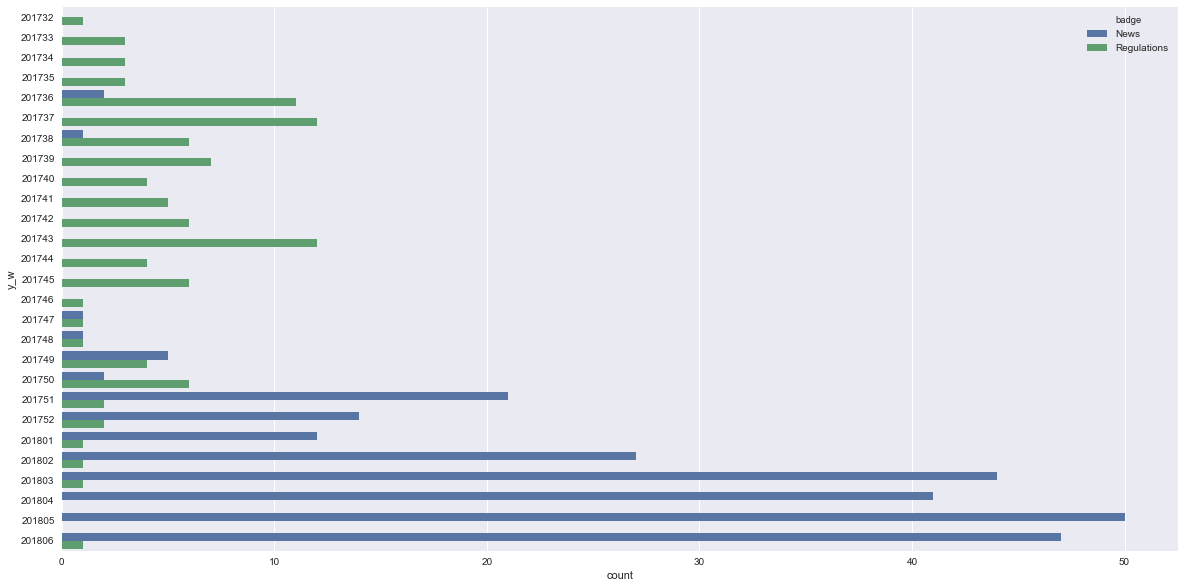

In [20]:
new_data = data[[True if x in ['News', 'Regulations'] else False for x in data['badge']]];

plt.figure(figsize = (20,10));
sns.countplot(data=new_data, y = 'y_w', hue = 'badge');

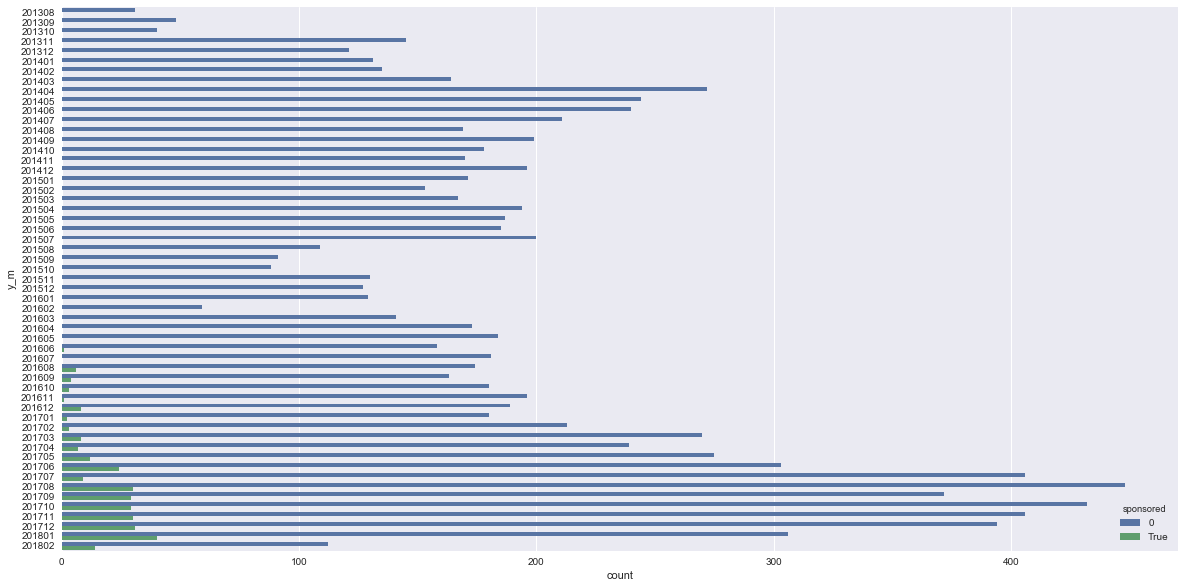

In [268]:
plt.figure(figsize = (20,10));
sns.countplot(data=data, y = 'y_m', hue = 'sponsored');